## Lead Brick Experiment

The following is the MuonDataFrameObject (`mdfo`) for the run with leadbricks (new set up - **28 Dec 2020**)

In [1]:
from MuonDataFrame import *
file = "processed_data/events_data_frame_74.h5"
mdfo = MuonDataFrame(file, isNew=False, d1="last") #Muon Data Frame Object 
mdf = mdfo.events_df
plt.rcParams['figure.figsize'] = [10, 7]

The following is the  MuonDataFrameObject (`mdfo1`)for the run with no leadbricks

In [2]:
file1 = "processed_data/events_data_frame_63.h5"
mdfo1 = MuonDataFrame(file1, isNew=False, d1="last") #Muon Data Frame Object 
mdf1 = mdfo1.events_df

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Comparison of the zenith angles

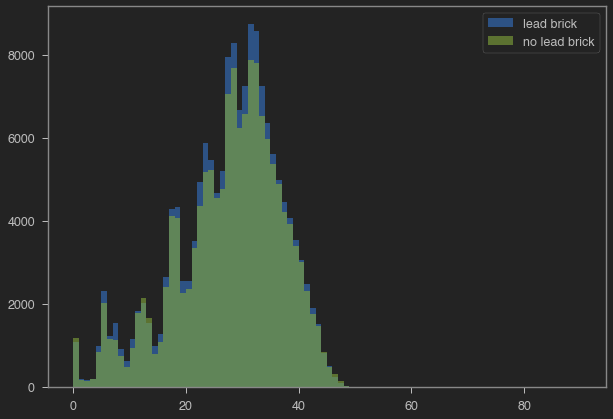

In [4]:
r1 = 0
r2 = 90
bins = 90

plt.hist(mdf['z_angle'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['z_angle'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

### Comparison of X Views

In [5]:
r1 = -180
r2 = 180
bins = 90

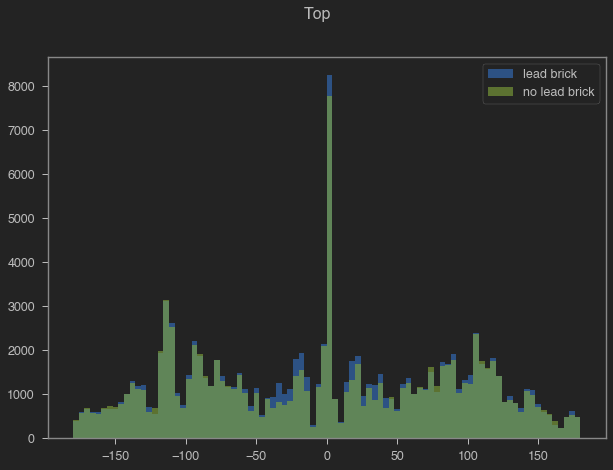

In [6]:
plt.suptitle("Top")
plt.hist(mdf['theta_x1'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['theta_x1'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

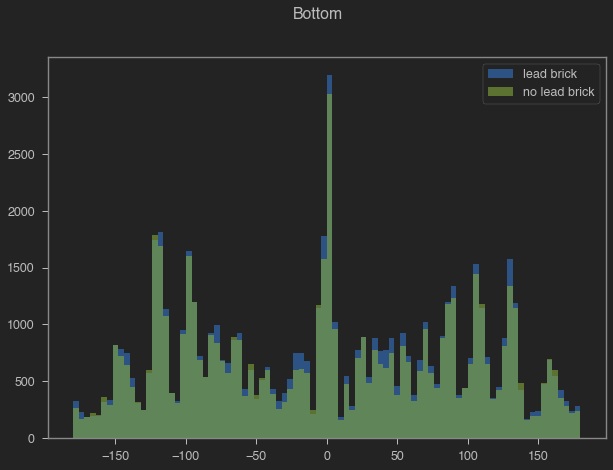

In [7]:
plt.suptitle("Bottom")
plt.hist(mdf['theta_x2'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['theta_x2'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

### Comparison of Y Views

In [8]:
r1 = -180
r2 = 180
bins = 90

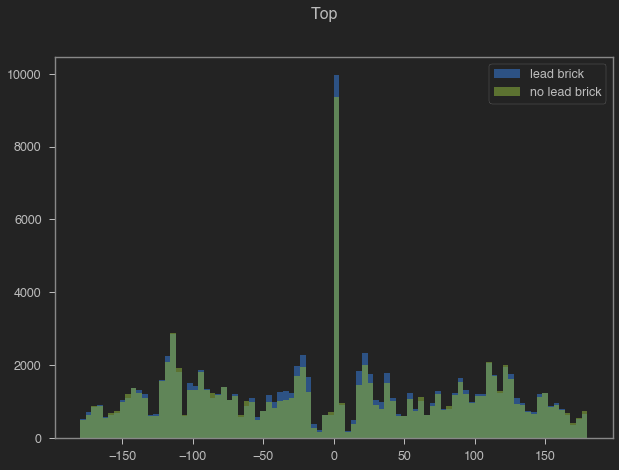

In [9]:
plt.suptitle("Top")
plt.hist(mdf['theta_y1'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['theta_y1'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

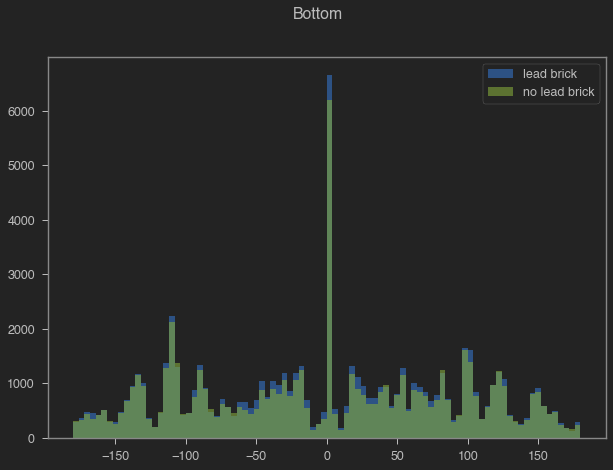

In [10]:
plt.suptitle("Bottom")
plt.hist(mdf['theta_y2'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['theta_y2'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

### Comparison of Tomograms

*Left: *With lead bricks. 
*Right: *With lead bricks. 

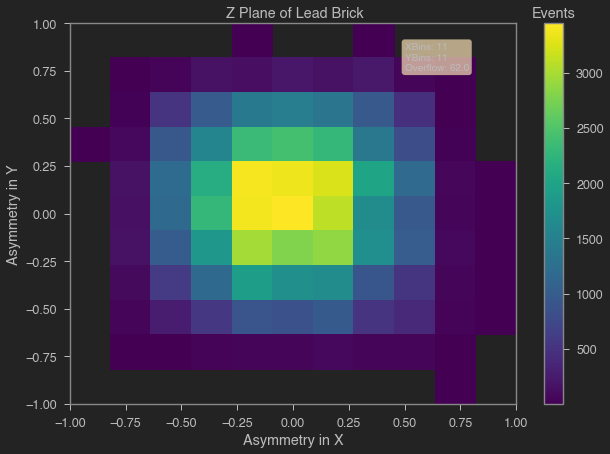

In [11]:
mdfo.get2DTomogram()

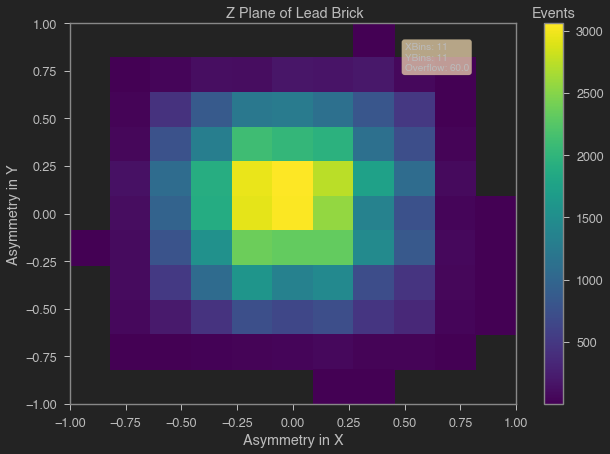

In [12]:
mdfo1.get2DTomogram()

### Generating the image: *1D Asymmetry Plot Projection and Comparison*

In [13]:
t = mdfo.getTValue()

# with lead brick
xx = mdfo.x(t)
yy = mdfo.y(t)

# without lead brick
xx1 = mdfo1.x(t)
yy1 = mdfo1.y(t)

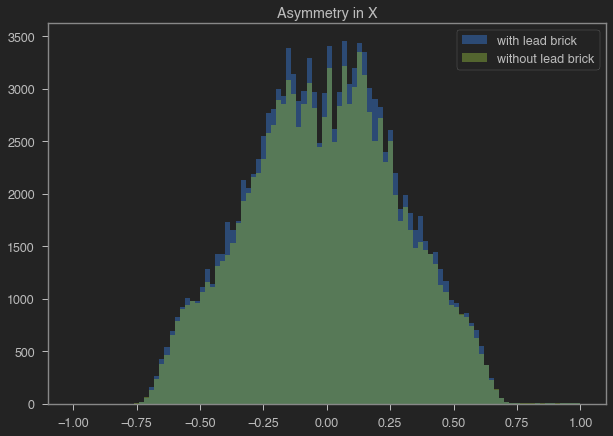

In [14]:
plt.hist(xx,alpha=0.5,bins=100,range=(-1,1),label="with lead brick")
plt.hist(xx1,alpha=0.5,bins=100,range=(-1,1),label="without lead brick")
plt.legend()
plt.title("Asymmetry in X")
plt.show()

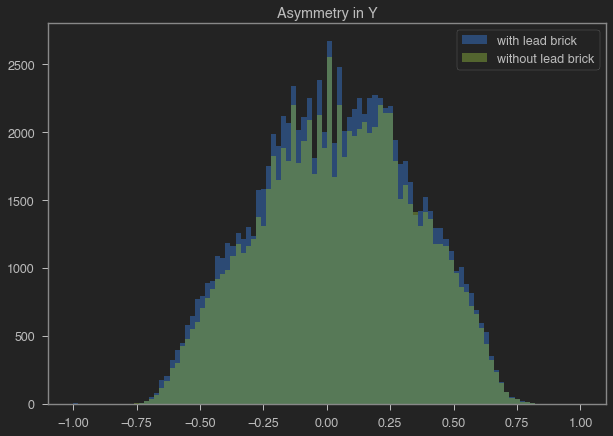

In [15]:
plt.hist(yy,alpha=0.5,bins=100,range=(-1,1),label="with lead brick")
plt.hist(yy1,alpha=0.5,bins=100,range=(-1,1),label="without lead brick")
plt.legend()
plt.title("Asymmetry in Y")
plt.show()

### 2D Tomogram

In [16]:
axes = [-1,1]

bins = (11,11)
ranges = (axes,axes)

h1, xedges, yedges = np.histogram2d(xx, yy, bins=bins, range=ranges)

In [17]:
axes = [-1,1]

bins = (11,11)
ranges = (axes,axes)

h2, xedges, yedges = np.histogram2d(xx1, yy1, bins=bins, range=ranges)

$$h1 \rightarrow \text{with lead bricks}$$
$$h2 \rightarrow \text{without lead bricks}$$

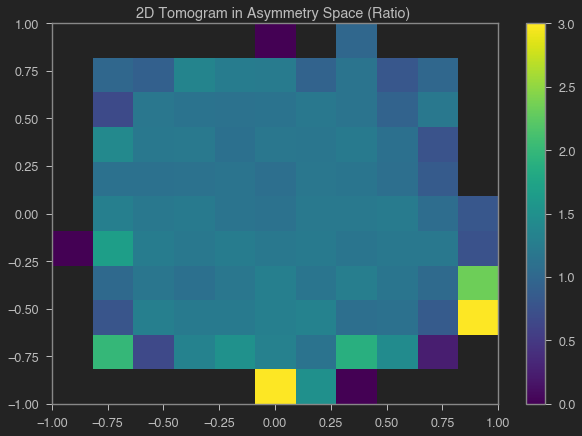

In [18]:
h = h1 / h2
fig, ax = plt.subplots(1)
pc = ax.pcolorfast(xedges, yedges, h.T)
plt.title("2D Tomogram in Asymmetry Space (Ratio) ")
plt.colorbar(pc)
plt.show()

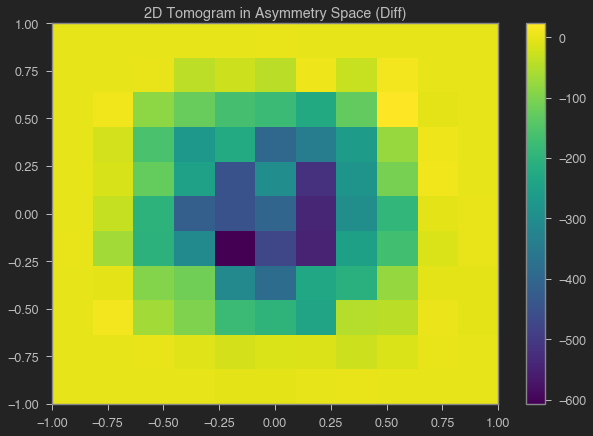

In [19]:
h = h2 - h1
fig, ax = plt.subplots(1)
pc = ax.pcolorfast(xedges, yedges, h.T)
plt.title("2D Tomogram in Asymmetry Space (Diff)")
plt.colorbar(pc)
plt.show()

Normalizing the ratio plot by changing all ratio's above 1 to 1.

In [20]:
h = h1 / h2
h_new = []
h_small = []
for i in h:
    for j in i:
        if j > 1:
            j = 1
        h_small.append(j)
    h_new.append(h_small)
    h_small = []
h_new = np.array(h_new)

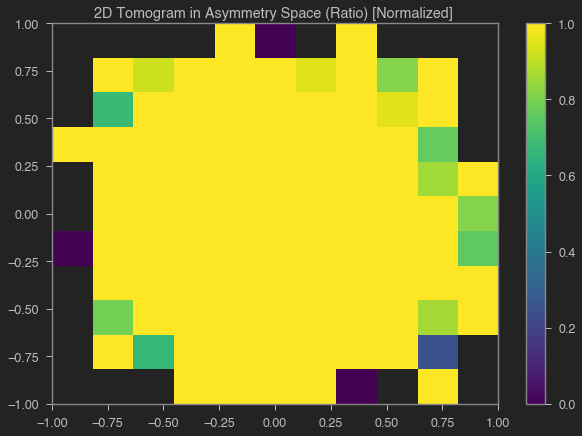

In [21]:
fig, ax = plt.subplots(1)
pc = ax.pcolorfast(xedges, yedges, h_new.T)
plt.title("2D Tomogram in Asymmetry Space (Ratio) [Normalized] ")
plt.colorbar(pc)
plt.show()

## Observations

The image cannot be seen *(obvious)*. The reason for this I believe is for one of three reasons: 

1. Due to the recent changes *(increases in HV values, changes to CFD, shift of Top counter histogram)* our overall efficiency has increased. This explains why the run with lead bricks had more events registered compared to the run without as seen on all the comparison plots. I suggest we take more data with the lead bricks mounted and then once we have collected enough, take runs without the lead bricks in this present configuration. 

In [22]:
leadEvs = len(mdfo.events_df[mdfo.events_df["numLHit"]==8]["numLHit"].values)
noLeadEvs = len(mdfo1.events_df[mdfo1.events_df["numLHit"]==8]["numLHit"].values)
effIncrease = (leadEvs - noLeadEvs) / noLeadEvs
effIncrease*100

17.837593897397078

In fact in the new configuration we see an $18\%$ increase in such "good events" required for the image analysis

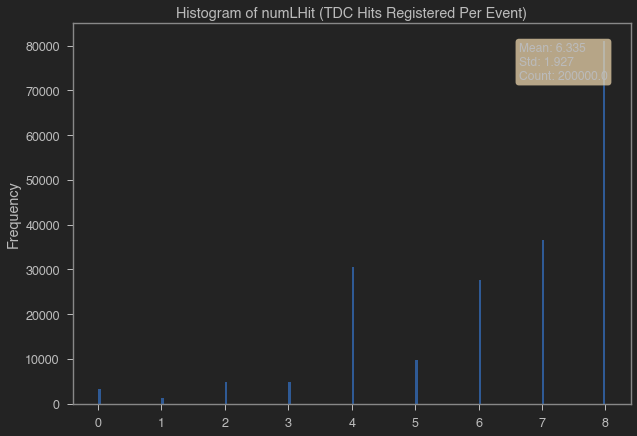

In [23]:
mdfo.getNumLayersHitPlot()

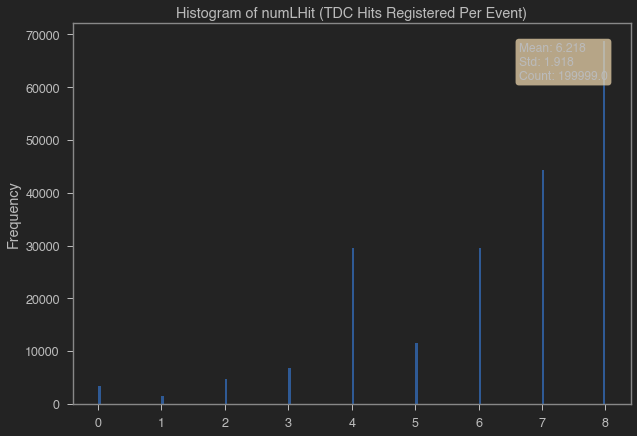

In [24]:
mdfo1.getNumLayersHitPlot()

2. We may not be seeing the image due to low statistics. Longer runs with bricks and without should give us a better image.

3. We may not be seeing the image because the lead depth may not be significant enough for muons. Cris needs to do MC simulation of this setup and give us the answers to the following questions
    - *Can we see the lead brick?*
    - *How many **minimum** muon events are required to see such an image?*
    
    
---